08/03/22

Author: Amalia Karalis

Collabs: Maude Lariviere, Ana Hoban, Mattias Lazda, Nick Desjardins


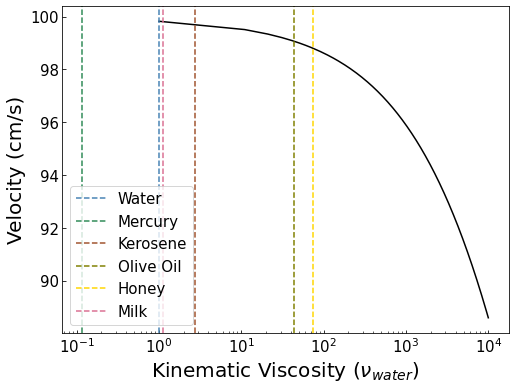

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## 2.2

n = 1000
v = np.linspace(1, 1e4, n)
def Power(u):
    ## the power is the sum of the forces (as calculated in 2.1) times velocity
    # u is velocity, v is viscosity
    
    c_f = 1
    c_p = 1
    rho = 1 # g/cm^3
    L_t = 150 # cm
    L_l = 10 # cm
    b = 20 # cm
    
    F_skin = 2*c_f*rho*u**2*L_t*b
    F_form = np.pi / 8 * c_p * rho * u**2 * b**2
    F_stokes = 4*rho * v**(1/2) * u**(3/2) * L_l**(1/2) * b
    
    P_i = 6.15e9 # the power we found in 2.1
    return (F_skin+F_form+F_stokes)*u - P_i


u_guess = np.zeros(n)+100
# now we solve for u as a function of v
u_sol = fsolve(Power, u_guess)

## list some common fluid viscosities (all in terms of v_water)
# from https://www.engineersedge.com/fluid_flow/kinematic-viscosity-table.htm
v_water = 1e-6 #(in SI)
v_olive_oil = 4.32e-5/v_water
v_honey = 7.36e-5/v_water
v_kerosene = 2.71e-6/v_water
v_mercury = 1.18e-7/v_water
v_milk = 1.13e-6/v_water

# plot
plt.figure(figsize=(8,6))
plt.plot(v, u_sol, color='black')
plt.xscale('log')
plt.axvline(1, label='Water', linestyle='--', color='steelblue')
plt.axvline(v_mercury, label='Mercury', linestyle='--', color='seagreen')
plt.axvline(v_kerosene, label='Kerosene', linestyle='--', color='sienna')
plt.axvline(v_olive_oil, label='Olive Oil', linestyle='--', color='olive')
plt.axvline(v_honey, label='Honey', linestyle='--', color='gold')
plt.axvline(v_milk, label='Milk', linestyle='--', color='palevioletred')
plt.legend(loc='lower left', fontsize=15)
plt.xlabel(r'Kinematic Viscosity ($\nu_{water}$)', fontsize=20)
plt.ylabel('Velocity (cm/s)', fontsize=20)
plt.tick_params(labelsize=15, direction='in')
plt.tick_params(which='minor',labelsize=15, direction='in')
plt.show()

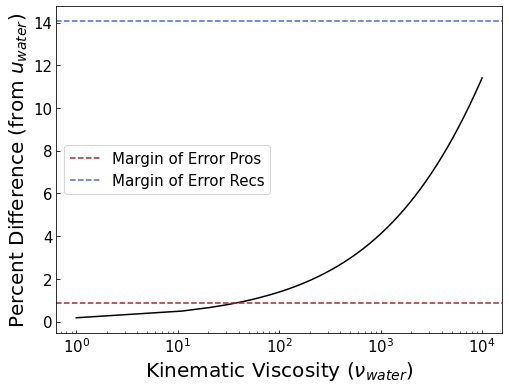

In [76]:
## 2.3
u_water = 100
percent_diff = abs(u_sol - u_water)/u_water * 100

## the variance for swim times
# for olympic athletes
# take 5 times for the men 100 freestyle at the olympics
# from https://olympics.com/en/olympic-games/tokyo-2020/results/swimming/men-s-100m-freestyle (mens) 
# and https://swimswam.com/olympic-results-digest-all-the-medalists-records-set-in-the-pool-in-tokyo/
u_pros = 100 / np.array([47.02, 47.08, 47.44, 47.72, 48.10])
mean_pros = np.mean(u_pros)
std_pros = np.std(u_pros)

# for recreational swimmers
# https://idswater.com/2020/08/25/how-fast-can-the-average-person-swim-100m/ says the average 100m swim is 120s
# I would say that +/- 20s is a good approximation for the standard deviation on this time
# since normal people swim at very different paces
mean_rec = 100/120
std_rec = np.std(100/np.array([100, 120, 140]))

# plot
plt.figure(figsize=(8,6))
plt.plot(v, percent_diff, color='black')
plt.axhline(std_pros/mean_pros*100, label='Margin of Error Pros', linestyle='--', color='firebrick')
plt.axhline(std_rec/mean_rec*100, label='Margin of Error Recs', linestyle='--', color='royalblue')
plt.xscale('log')
plt.legend(fontsize=15)
plt.xlabel(r'Kinematic Viscosity ($\nu_{water}$)', fontsize=20)
plt.ylabel(r'Percent Difference (from $u_{water}$)', fontsize=20)
plt.tick_params(labelsize=15, direction='in')
plt.tick_params(which='minor',labelsize=15, direction='in')
plt.show()